In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px

videojuegos= pd.read_csv('vgsales.csv') 
print(videojuegos.isnull().sum(), videojuegos.shape)

display(videojuegos.tail())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


### Datos
El conjunto de datos esta relacionado a las ventas de los videojuegos globalmente, principal mente en las naciones que consumen mas estos productos tales como Japon y Estados Unidos 

In [4]:
videojuegos= pd.read_csv('vgsales.csv') 
display(videojuegos.head())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Ahora verificamos los campos que contengan valores nulos para su tratamiento con la funcion isnull que devuelve una estructura con las mismas dimensiones que la que se cede como argumento los valores que contengan nulos y la funcion sum() para que nos devuelva la suma de la columna de entrada o valores de la expresión

In [5]:
print(videojuegos.isnull().sum(), videojuegos.shape)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64 (16598, 11)


##### Filtrado de datos 
Con el analisis anterior realizamos el filtrado de datos con la funcion  dropna()

In [6]:
videojuegos = videojuegos.dropna()
print(videojuegos.isnull().sum(), videojuegos.shape)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64 (16291, 11)


#### Organizacion de datos 
Con los datos ya filtrados, organizamos su estructura de los campos para una lectura mas fluyente y imprimimos los primeros 5 registros para visualizar los resultados obtenidos 

In [7]:
videojuegos = videojuegos.sort_values(by='Year', ascending=True)
videojuegos= videojuegos[['Year', 'Rank', 'Name', 'Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
display(videojuegos.head())

,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,1980.0,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,1980.0,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1980.0,1971,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,1980.0,5368,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1980.0,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


Ahora que tenemos los campos organisadoz, se establecera un nuevo dataset para unificar los valores de las epocas que trasncurren, con el objetivo de poder plasmar en un diagrama el comportamiento de las ventas en los diferentes regiones de forma mas visual la lectura de los datos

In [16]:
year= list(videojuegos.Year.unique())
global_sales=[]
eu_sales =[]
na_Sales = []
jp_Sales = []
other_Sales = []

for i in year:
    val=videojuegos[videojuegos.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)
    x= val.EU_Sales.sum()
    eu_sales.append(x)
    x= val.NA_Sales.sum()
    na_Sales.append(x)
    x= val.JP_Sales.sum()
    jp_Sales.append(x)
    x= val.Other_Sales.sum()
    other_Sales.append(x)
    
general_sales = pd.DataFrame({'Year':year, 
                              'Global_Sales':global_sales, 
                              'EU_Sales':eu_sales, 
                              'JP_Sales':jp_Sales,
                              'Other_Sales':other_Sales,
                              'NA_Sales':na_Sales})
display(general_sales.head())

,Year,Global_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales
0,1980.0,11.38,0.67,0.00,0.12,10.59
1,1981.0,35.77,1.96,0.00,0.32,33.40
2,1982.0,28.86,1.65,0.00,0.31,26.92
3,1983.0,16.79,0.80,8.10,0.14,7.76
4,1984.0,50.36,2.10,14.27,0.70,33.28


Con la informacion anterior podemos ya realizar una representacion grafica con datos generales con las ventas globales, para poder observar el comportamiento de las ventas que adquirido a traves de los anos transcurido 

In [17]:
b1= alt.Chart(general_sales).mark_bar().encode(
    x='Year:O',
    y='Global_Sales:Q'
)
b2= alt.Chart(general_sales).mark_area().encode(
    alt.X('Year:Q'),
    alt.Y('Global_Sales:Q')
)
b1

alt.Chart(...)

Con esta informacion podemos percibir de forma informar el incremento de las ventas al comienzo del milenio, por lo que representaremos una grafia mas a detalle la evolucion de ventas en esta epoca

In [18]:
filtro = general_sales['Year'] >2000

alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='Global_Sales',
   size='Global_Sales:Q'
).interactive()

alt.Chart(...)

Ahora vizualizamos las ventas en forma mas regional, en donde podemos observar mas a detalle los puntos mas conveniente en la venta de estos productos de la industria 

In [19]:
fig1 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='EU_Sales',
   
)
fig2 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='JP_Sales',
  
   color=alt.value("black")
)
fig3 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='Other_Sales',
   
   color=alt.value("Green")
)
fig4 = alt.Chart(general_sales[filtro]).mark_trail().encode(
    x='Year:O',
    y='NA_Sales',
   
   color=alt.value("Red"),
)

fig1 = fig1 + fig1.mark_point()
fig2 = fig2 + fig2.mark_point()
fig3 = fig3 + fig3.mark_point()
fig4 = fig4 + fig4.mark_point()
show1 = (fig3 | fig4) 
show2 = (fig1 | fig2) 
show1 & show2


alt.VConcatChart(...)

In [20]:
videojuegos.head()

,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,1980.0,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,1980.0,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1980.0,1971,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,1980.0,5368,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1980.0,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [ ]:

filtro = videojuegos['Year'] >2000
base = alt.Chart(videojuegos[filtro]).encode(
    x='Global_Sales',
    y="Platform:O",
    text='Global_Sales'
)
base.mark_bar() 


Ahora que tenemos una idea mas general el comportamiento que a adquirido esta industria, verificaremos que tipo de generos de videojuegos a sido mas constante en el mercado

In [21]:
filtro = videojuegos['Global_Sales'] >5
brush = alt.selection_interval()
alt.Chart(videojuegos[filtro]).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales',
    color=alt.condition(brush, 'Publisher:O', alt.value('grey')),
    tooltip=['Name', 'Publisher', 'Global_Sales', 'Year']
).add_params(brush)

alt.Chart(...)

Con la informacion ya obtenida podemos realizar un analisis rapido, en cual podemos apleciar que las consolas mas popularles en el mercado "PS2", "PS3", "Xbox 360", "Wii" y "Nitendo DS". Esta informacion nos proporciona la demanda que produce en el mercado, para conocer mas a detalle que factores se requiere para obtener este impacto en estas generaciones de consolas

,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2487,2000.0,2489,FIFA Soccer World Championship,PS2,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83
12566,2000.0,12568,Winning Post 4 Maximum,PS2,Sports,Tecmo Koei,0.00,0.00,0.06,0.00,0.06
5818,2000.0,5820,Orphen: Scion of Sorcery,PS2,Role-Playing,Activision,0.15,0.12,0.00,0.04,0.31
12013,2000.0,12015,G-Saviour,PS2,Action,Sunrise Interactive,0.00,0.00,0.07,0.00,0.07
5629,2000.0,5631,Sky Odyssey,PS2,Simulation,Sony Computer Entertainment,0.16,0.12,0.00,0.04,0.32


(2127, 11)


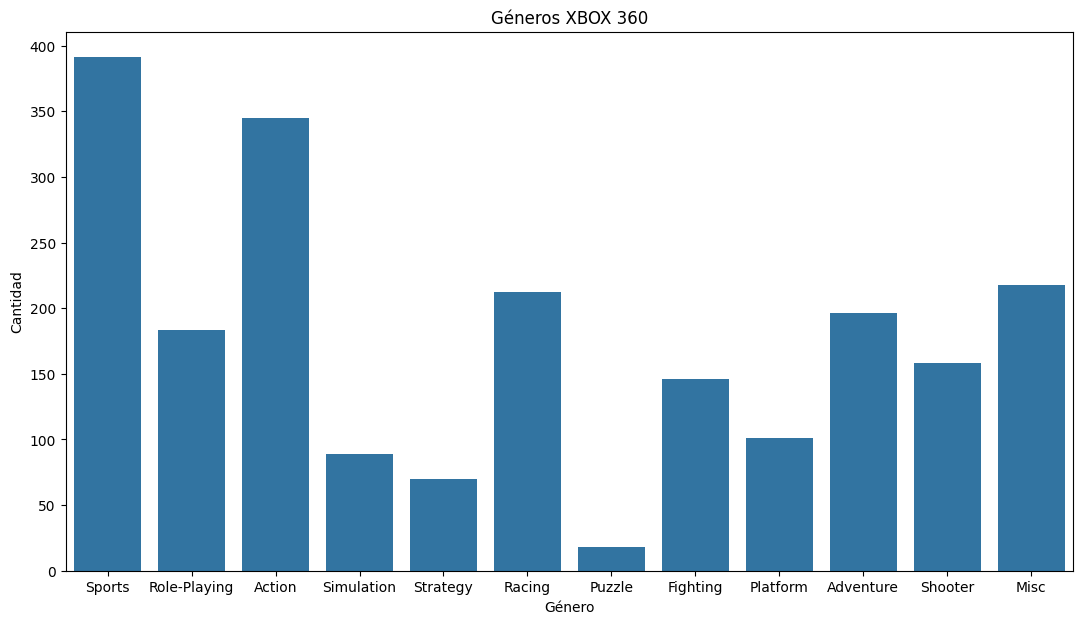

In [22]:
xbox_360 = videojuegos[(videojuegos.Platform == 'PS2')]
xbox_360.Genre.unique()
display(xbox_360.head())
print(xbox_360.shape)

plt.figure(figsize=(13,7))
sns.countplot(x='Genre', data=xbox_360)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Géneros XBOX 360')
plt.show()

In [43]:
# Consola Xbox 360

xbox_360 = videojuegos[(videojuegos.Platform == 'X360')]
xbox_360.Name.unique()
xbox_360.Year.unique()
# display(xbox_360.head())
# print(xbox_360.shape)

filtro = videojuegos['Global_Sales'] >6.5
fig1_xbox = alt.Chart(xbox_360).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular Xbox 360")

fig2_xbox = alt.Chart(xbox_360[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular Xbox 360")
fig2_xbox = fig2_xbox.mark_bar() + fig2_xbox.mark_text(align='left', dx=2)

# Consola PS 2

PS2 = videojuegos[(videojuegos.Platform == 'PS3')]
PS2.Name.unique()
PS2.Year.unique()

fig1_ps2 = alt.Chart(PS2).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular PS2")

fig2_ps2 = alt.Chart(PS2[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular PS2")
fig2_ps2 = fig2_ps2.mark_bar() + fig2_ps2.mark_text(align='left', dx=2)

# Consola Wii

wii = videojuegos[(videojuegos.Platform == 'Wii')]
wii.Name.unique()
wii.Year.unique()


fig1_wii = alt.Chart(wii).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Sales:Q',
    color='Genre',
    tooltip=['Name', 'Genre', 'Year', 'Global_Sales']
).interactive().properties(title="Tipo de genero mas popular Wii")

fig2_wii = alt.Chart(wii[filtro]).encode(
    x='Global_Sales',
    y="Name",
    text='Global_Sales'
).interactive().properties(title="Juegos mas popular Wii")
fig2_wii = fig2_wii.mark_bar() + fig2_wii.mark_text(align='left', dx=2)
show1 = (fig1_xbox | fig2_xbox)
show2 = (fig1_ps2 | fig2_ps2)
show3 = (fig1_wii | fig2_wii)
show1 & show2 & show3

C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\3243173664.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_xbox = alt.Chart(xbox_360[filtro]).encode(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\3243173664.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_ps2 = alt.Chart(PS2[filtro]).encode(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\3243173664.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fig2_wii = alt.Chart(wii[filtro]).encode(


alt.VConcatChart(...)

In [ ]:
alt.Chart(d1).mark_circle(size=60).encode(
    x='Global_Sales:O',
    y='Year:O',
    tooltip=[ 'Global_Sales', 'Year']
).interactive()

In [ ]:
year= list(videojuegos.Year.unique())
global_sales=[]

for i in year:
    val=videojuegos[videojuegos.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)

d1 = pd.DataFrame({'Year':year, 'Global_Sales':global_sales})
alt.Chart(d1).mark_area().encode(
    alt.X('Year:Q'),
    alt.Y('Global_Sales:Q')
)


Nuestro primer paso ha sido cargar la base de datos y almacenarla en nuestro Data frame "videojuegos" ,para poder hacer uso de él cuando la necesitemos. A continuación, observamos cuantos valores nulos contiene este ejemplo y los limpiamos para poder obtener un mejor estudio. Finalizado este proceso, imprimimos los cinco primeros valores y los cinco finales para observar como se estructura este conjuto de datos.

Mediante un análisis rápido, se puede apreciar que los videojuegos están ordenados de mayor a menor, en cuanto a ventas globales obtenidas. Siendo el primero "Wii Sports" por un valor de 82,74 millones de dólares.

Para poder visualizar de forma más intuitiva como evolucionan dichos ingresos, vamos a ordenar los datos en base al año de su puesta en venta.

In [ ]:
videojuegos = videojuegos.sort_values(by='Year', ascending=True)
videojuegos= videojuegos[['Year', 'Rank', 'Name', 'Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
display(videojuegos.head())
display(videojuegos.tail())

In [ ]:
year= list(videojuegos.Year.unique())
global_sales=[]

for i in year:
    val=videojuegos[videojuegos.Year == i]
    x= val.Global_Sales.sum()
    global_sales.append(x)

d1 = pd.DataFrame({'Year':year, 'Global_Sales':global_sales})

fig,ax= plt.subplots(figsize=(13,7))
ax.plot(d1['Year'], d1['Global_Sales'], color='purple')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas Globales')
ax.set_title('Ventas Globales totales por año')
plt.show()

In [ ]:
year_per_sales=list(videojuegos.Year.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]



for i in year_per_sales:
    val=videojuegos[videojuegos.Year==i]
    na_sales.append(val.NA_Sales.sum())
    eu_sales.append(val.EU_Sales.sum())
    jp_sales.append(val.JP_Sales.sum())
    other_sales.append(val.Other_Sales.sum())

d2= pd.DataFrame({'Year': year_per_sales, 'NA_Sales': na_sales, 'EU_Sales': eu_sales, 'JP_Sales': jp_sales, 'Other_Sales': other_sales})
    
fig, ax = plt.subplots(2,2,figsize=(14,9))
ax[0,0].plot(d2['Year'], d2['NA_Sales'], color='blue')
ax[0,1].plot(d2['Year'], d2['EU_Sales'], color='red')
ax[1,0].plot(d2['Year'], d2['JP_Sales'], color='green')
ax[1,1].plot(d2['Year'], d2['Other_Sales'], color='yellow')

ax[0,0].set_xlabel('Año')
ax[0,1].set_xlabel('Año')
ax[1,0].set_xlabel('Año')
ax[1,1].set_xlabel('Año')

ax[0,0].set_ylabel('Ventas NA')
ax[0,1].set_ylabel('Ventas EU')
ax[1,0].set_ylabel('Ventas JP')
ax[1,1].set_ylabel('Ventas Other')


plt.show()

In [ ]:
xbox_360 = videojuegos[(videojuegos.Platform == 'X360')]
xbox_360.Genre.unique()
display(xbox_360.head())
print(xbox_360.shape)

plt.figure(figsize=(13,7))
sns.countplot(x='Genre', data=xbox_360)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Géneros XBOX 360')
plt.show()